<a href="https://colab.research.google.com/github/Vita1ik/Machine_Learning/blob/main/IMAGES_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Класифікація зображень собак з емоціями за допомогою машинного навчання

Опис:
Цей ноутбук демонструє використання різних алгоритмів машинного навчання для класифікації зображень собак з емоціями.
Він включає три типи класифікаторів:
* Random Forest
* Feedforward Neural Network (FFNN)
* Convolutional Neural Network (CNN)

Використання:
1. Підключення Google Drive для доступу до набору даних.
2. Імпорт необхідних бібліотек:
  * Бібліотеки для роботи з моделями глибокого навчання (Keras).
  * Бібліотеки для обробки зображень (PIL, OpenCV).
  * Бібліотеки для реалізації машинного навчання (Scikit-learn).
3. Визначення абстрактного класу інтерфейсу для класифікаторів.
4. Реалізація трьох класів класифікаторів:
  * RandomForestMnistClassifier
  * FeedForwardMnistClassifier
  * CnnMnistClassifier
5. Створення обгортки MnistClassifier для вибору алгоритму класифікації.
6. Створення класу DogEmoDataset для завантаження та обробки набору даних.
7. Функції для візуалізації зображень та результатів прогнозування.
8. Функції для збереження та завантаження навчених моделей.

Переваги:
* Зручне перемикання між різними моделями.
* Можливість навчання на кастомному наборі зображень.
* Візуалізація результатів.
* Збереження моделей для подальшого використання.

Необхідні бібліотеки:
tensorflow, keras, scikit-learn, pillow, opencv-python, numpy

Набір даних:
Власний набір зображень собак з емоціями, розміщений на Google Drive.

Приклад використання:
```python
cnn_classifier = MnistClassifier(algorithm='cnn')
cnn_classifier.train(X, y)
preds = cnn_classifier.predict(X[:10])
```

Висновок:
Цей код надає потужний інструмент для класифікації зображень з використанням різних алгоритмів машинного навчання.

In [10]:
# 1️⃣ Підключаємо Google Drive
from google.colab import drive
drive.mount('/content/drive')

# 2️⃣ Імпортуємо бібліотеки
import os
import torch
import numpy as np
import pickle
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras import layers, models
from abc import ABC, abstractmethod


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
class MnistClassifierInterface(ABC):
    @abstractmethod
    def train(self, X_train, y_train):
        pass

    @abstractmethod
    def predict(self, X_test):
        pass

    @abstractmethod
    def save_model(self, path):
        pass

    @abstractmethod
    def load_model(self, path):
        pass

class RandomForestMnistClassifier(MnistClassifierInterface):
    def __init__(self, n_estimators=100):
        self.model = RandomForestClassifier(n_estimators=n_estimators)

    def train(self, X_train, y_train):
        self.model.fit(X_train, y_train)

    def predict(self, X_test):
        return self.model.predict(X_test)

    def save_model(self, path):
        with open(path, 'wb') as f:
            pickle.dump(self.model, f)

    def load_model(self, path):
        with open(path, 'rb') as f:
            self.model = pickle.load(f)

class FeedForwardMnistClassifier(MnistClassifierInterface):
    def __init__(self, input_shape):
        self.model = models.Sequential([
            layers.Dense(128, activation='relu', input_shape=(input_shape,)),
            layers.Dense(64, activation='relu'),
            layers.Dense(len(dataset.classes), activation='softmax')
        ])
        self.model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    def train(self, X_train, y_train, epochs=10, batch_size=32):
        self.model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)

    def predict(self, X_test):
        return np.argmax(self.model.predict(X_test), axis=1)

    def save_model(self, path):
        self.model.save(path)

    def load_model(self, path):
        self.model = models.load_model(path)

class CnnMnistClassifier(MnistClassifierInterface):
    def __init__(self, input_shape=(128, 128, 3)):
        self.model = models.Sequential([
            layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
            layers.MaxPooling2D((2, 2)),
            layers.Conv2D(64, (3, 3), activation='relu'),
            layers.MaxPooling2D((2, 2)),
            layers.Conv2D(128, (3, 3), activation='relu'),
            layers.MaxPooling2D((2, 2)),
            layers.Flatten(),
            layers.Dense(128, activation='relu'),
            layers.Dense(len(dataset.classes), activation='softmax')
        ])
        self.model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    def train(self, X_train, y_train, epochs=10, batch_size=10):
        self.model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)

    def predict(self, X_test):
        return np.argmax(self.model.predict(X_test), axis=1)

    def save_model(self, path):
        self.model.save(path)

    def load_model(self, path):
        self.model = tf.keras.models.load_model(path)

class MnistClassifier:
    def __init__(self, algorithm='rf'):
        if algorithm == 'rf':
            self.classifier = RandomForestMnistClassifier()
        elif algorithm == 'ffnn':
            self.classifier = FeedForwardMnistClassifier(128*128*3)
        elif algorithm == 'cnn':
            self.classifier = CnnMnistClassifier((128, 128, 3))
        else:
            raise ValueError("Unsupported algorithm. Choose from 'rf' or 'nn'.")

    def train(self, X_train, y_train):
        self.classifier.train(X_train, y_train)

    def predict(self, X_test):
        return self.classifier.predict(X_test)

    def save_model(self, path):
        self.classifier.save_model(path)

    def load_model(self, path):
        self.classifier.load_model(path)

In [94]:
class DogEmoDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.image_paths = []
        self.labels = []
        self.classes = sorted(os.listdir(root_dir))

        count = 0
        for label, class_name in enumerate(self.classes):
            class_dir = os.path.join(root_dir, class_name)
            for img_name in os.listdir(class_dir):
                img_path = os.path.join(class_dir, img_name)
                self.image_paths.append(img_path)
                self.labels.append(label)
                count += 1

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        label = self.labels[idx]
        image = Image.open(img_path).convert("RGB")

        if self.transform:
            image = self.transform(image)

        return image, label

def show_images(dataloader, num_images=5):
    images, labels = next(iter(dataloader))
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for i in range(num_images):
        img = images[i].permute(1, 2, 0).numpy()
        img = (img * 0.5) + 0.5  # Денормалізуємо
        label = dataset.classes[labels[i].item()]

        axes[i].imshow(img)
        axes[i].set_title(f"Class: {label}")
        axes[i].axis('off')
    plt.show()

def show_predictions_cnn(X_test, y_true, y_pred, num_images=10):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))

    for i in range(num_images):
        img = X_test[i]
        true_label = dataset.classes[y_true[i]]
        pred_label = dataset.classes[y_pred[i]]

        axes[i].imshow(img)
        axes[i].set_title(f"Pred: {pred_label}\nActual: {true_label}")
        axes[i].axis('off')

    plt.show()

def show_predictions(X_test, y_true, y_pred, num_images=10):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))

    for i in range(num_images):
        img = X_test[i].reshape(128, 128, 3)
        img = (img * 0.5) + 0.5  # Денормалізуємо
        true_label = dataset.classes[y_true[i]]
        pred_label = dataset.classes[y_pred[i]]

        axes[i].imshow(img)
        axes[i].set_title(f"Pred: {pred_label}\nActual: {true_label}")
        axes[i].axis('off')

    plt.show()

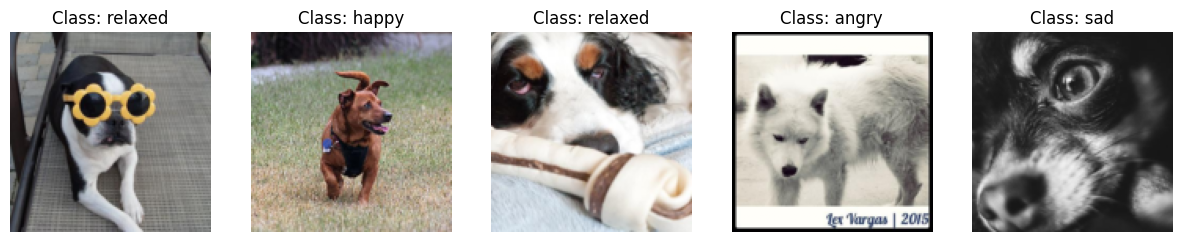

In [95]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
dataset_path = "/content/drive/MyDrive/dogs/images"

dataset = DogEmoDataset(root_dir=dataset_path, transform=transform)
train_loader = DataLoader(dataset, batch_size=10, shuffle=True)

show_images(train_loader)


In [ ]:
X, y = [], []
for images, labels in train_loader:
    X.append(images.view(images.size(0), -1).numpy())
    y.append(labels.numpy())

X = np.vstack(X)
y = np.hstack(y)

rf_classifier = MnistClassifier(algorithm='rf')
rf_classifier.train(X, y)
preds = rf_classifier.predict(X[:10])

for i in range(10):
    print(f"Predicted: {dataset.classes[preds[i]]}, Actual: {dataset.classes[y[i]]}")

# show_predictions(X[:10], y[:10], preds[:10])

In [ ]:
X, y = [], []
for images, labels in train_loader:
    X.append(images.view(images.size(0), -1).numpy())
    y.append(labels.numpy())

X = np.vstack(X)
y = np.hstack(y)

ffnn_classifier = MnistClassifier(algorithm='ffnn')
ffnn_classifier.train(X, y)
preds = rf_classifier.predict(X[:10])

for i in range(10):
    print(f"Predicted: {dataset.classes[preds[i]]}, Actual: {dataset.classes[y[i]]}")


# show_predictions(X[:10], y[:10], preds[:10])


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 275ms/step - accuracy: 0.7246 - loss: 0.4227
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 269ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 271ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 265ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 263ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 444ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 265ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 269ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 441ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 10/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 262ms/step - accuracy: 1.0000 - loss: 0.0000e+00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


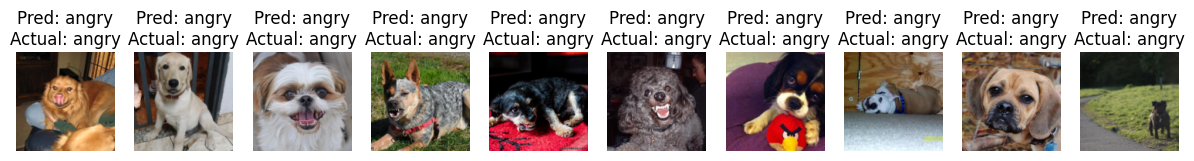

In [67]:
# Перетворюємо X у правильну форму (batch_size, 128, 128, 3)
X = np.array([img[0].numpy().transpose(1, 2, 0) for img in dataset])
y = np.array([img[1] for img in dataset])

X = (X - X.min()) / (X.max() - X.min())  # Масштабуємо значення до [0, 1]

cnn_classifier = MnistClassifier(algorithm='cnn')
cnn_classifier.train(X, y)
preds = cnn_classifier.predict(X[:10])

show_predictions_cnn(X[:10], y[:10], preds[:10])
